In [51]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [52]:
df = pd.read_csv("Churn_Modelling.csv")

In [53]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [54]:
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis=1 )

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


<Axes: >

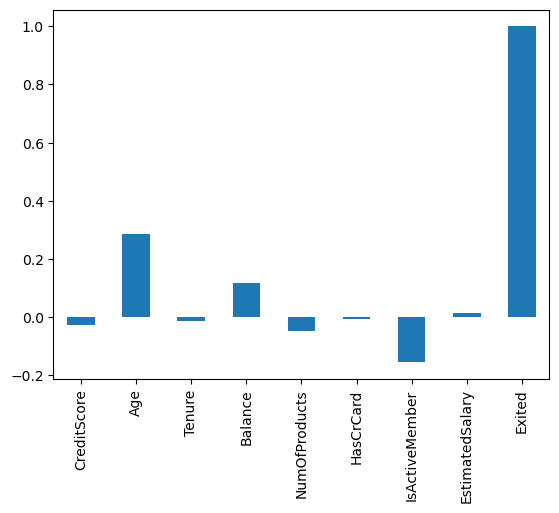

In [56]:
df.corr(numeric_only=True)["Exited"].plot(kind = "bar")

In [57]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [58]:
df = pd.get_dummies(df, drop_first= True, dtype= int)

In [59]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [60]:
import pickle

In [61]:
with open("one_hot_encoder.pkl", "wb") as file:
    pickle.dump(df.columns, file)

In [62]:
X = df.drop("Exited", axis = 1)
y = df["Exited"]

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [65]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [66]:
with open("standard_scaler.pkl", 'wb') as file:
    pickle.dump(scaler, file)

In [67]:
import tensorflow as tf
from tensorflow.keras.models import Sequential

In [68]:
from tensorflow.keras.layers import Dense, Input, Dropout

In [69]:
scaled_X_train.shape

(8000, 11)

In [70]:
model = Sequential()
model.add(Input(shape = (scaled_X_train.shape[1], )))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))

In [71]:
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics= ["accuracy"])

In [72]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [73]:
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

In [74]:
early_stop = EarlyStopping(patience = 5)

In [75]:
board = TensorBoard(log_dir='logs/fit/', histogram_freq=1, write_graph=True, write_images=True)

In [76]:
history = model.fit(scaled_X_train, y_train, validation_data = (scaled_X_test, y_test), epochs = 100, callbacks = [early_stop, board])

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7158 - loss: 0.5780 - val_accuracy: 0.7895 - val_loss: 0.4452
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8031 - loss: 0.4590 - val_accuracy: 0.8080 - val_loss: 0.4222
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.8058 - loss: 0.4469 - val_accuracy: 0.8160 - val_loss: 0.4109
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8107 - loss: 0.4400 - val_accuracy: 0.8275 - val_loss: 0.3982
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8241 - loss: 0.4252 - val_accuracy: 0.8430 - val_loss: 0.3845
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8237 - loss: 0.4185 - val_accuracy: 0.8480 - val_loss: 0.3720
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8284 - loss: 0.4161 - val_accuracy: 0.8490 - val_loss: 0.3630
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8385 - loss: 0.3899 - val_a

In [77]:
model.save("ANN.keras")

In [78]:
metrics = pd.DataFrame(model.history.history)

<Axes: >

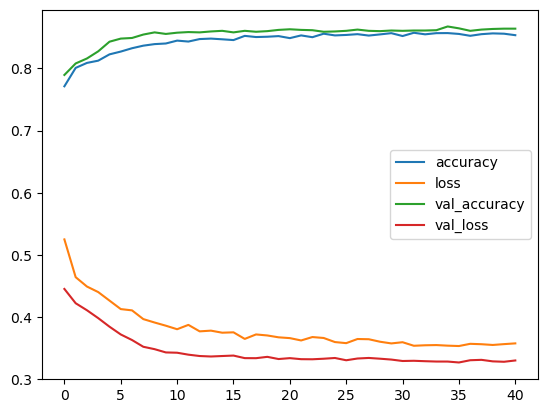

In [79]:
metrics.plot()

In [80]:
from sklearn.metrics import classification_report, confusion_matrix

In [81]:
pred_y = (model.predict(scaled_X_test) > 0.5).astype(int)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [82]:
print(classification_report(y_test, pred_y))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1577
           1       0.85      0.43      0.57       423

    accuracy                           0.86      2000
   macro avg       0.86      0.71      0.75      2000
weighted avg       0.86      0.86      0.85      2000



In [83]:
print(confusion_matrix(y_test, pred_y))

[[1546   31]
 [ 241  182]]


In [84]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [85]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 1897), started 14:02:56 ago. (Use '!kill 1897' to kill it.)

In [86]:
# Example input data
input_data = {
    'CreditScore': 600,
    'Geography': 'France',
    'Gender': 'Male',
    'Age': 40,
    'Tenure': 3,
    'Balance': 60000,
    'NumOfProducts': 2,
    'HasCrCard': 1,
    'IsActiveMember': 1,
    'EstimatedSalary': 50000
}

In [87]:
with open("standard_scaler.pkl", "rb") as file:
    scaler = pickle.load(file)

In [88]:
new_df = pd.DataFrame([input_data])

In [89]:
new_df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,600,France,Male,40,3,60000,2,1,1,50000


In [90]:
updated = pd.get_dummies(new_df, dtype= int)

In [91]:
with open('one_hot_encoder.pkl', 'rb') as f:
    saved_columns = pickle.load(f)

In [92]:
updated = updated.reindex(columns=saved_columns, fill_value=0)

In [93]:
updated = updated.drop('Exited', axis = 1)

In [94]:
scaled_test = scaler.transform(updated)

In [95]:
prediction = (model.predict(scaled_test) > 0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [96]:
if prediction == 0:
    print("The customer will not churn")
else:
    print("The customer will churn")

The customer will not churn


In [97]:
saved_columns[9:11]

Index(['Geography_Germany', 'Geography_Spain'], dtype='object')